<a href="https://colab.research.google.com/github/nikesh11xx/Data-to-Decision-blog/blob/main/nikesh%20Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import binom
from scipy.stats import shapiro

In [21]:
# loading data file

data = pd.read_csv('/content/superstore_data.csv')
pd.set_option('display.max_columns',None)

In [22]:
# creating copy data

copy_df = data.copy()

#Observation

- numerical columns: Year_Birth, Income, Mntwines, MntFruits, MntMeatProducts, MntFishProduct, MntSweetProduct, MntGoldProds,  

- categorical columns: Education, Maritial_Status, Kidhome, Teenhome, Recency, NumDealsPurchases, NumWebPurchases, NumCatloPurchase, NumStorePurchases,
NumWebVisitsMonth, Response, Complain

  - There are 24 values are missing in Income columns which is the 1.07 percent of the its columns.
  - Income column value is highly left side skew and huge outlier in right side.
  - Dt_Customer have the value of DD/MM/YYYY but data type is object we have to change the datatype object to datetime
  - Year_Birth column have the value of 3 three customer which age is more the 120 year its a outlier in a data

In [23]:
copy_df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


In [24]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
copy_df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


#changing Dt_customer data type

In [26]:
copy_df['Dt_Customer'] = pd.to_datetime(copy_df.Dt_Customer).dt.to_period('M')

In [27]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Id                   2240 non-null   int64    
 1   Year_Birth           2240 non-null   int64    
 2   Education            2240 non-null   object   
 3   Marital_Status       2240 non-null   object   
 4   Income               2216 non-null   float64  
 5   Kidhome              2240 non-null   int64    
 6   Teenhome             2240 non-null   int64    
 7   Dt_Customer          2240 non-null   period[M]
 8   Recency              2240 non-null   int64    
 9   MntWines             2240 non-null   int64    
 10  MntFruits            2240 non-null   int64    
 11  MntMeatProducts      2240 non-null   int64    
 12  MntFishProducts      2240 non-null   int64    
 13  MntSweetProducts     2240 non-null   int64    
 14  MntGoldProds         2240 non-null   int64    
 15  NumD

# creating a Age column and removing outlier from Age column column

In [28]:
# creating a column name Age which have the value of customer age
copy_df['Age'] = 2023 - copy_df['Year_Birth']

In [29]:
# droping the Year_Birth column

copy_df.drop('Year_Birth', axis=1, inplace=True)


In [30]:
# drop the value which age is greater then 100

copy_df.drop(copy_df.index[copy_df['Age'] >= 100],inplace=True)


<ipython-input-31-30ab04579004>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy_df['Age'])


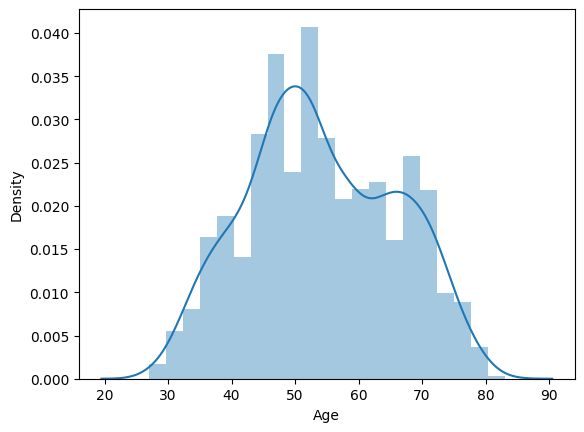

In [31]:
sns.distplot(copy_df['Age'])
plt.show()

<Axes: ylabel='Age'>

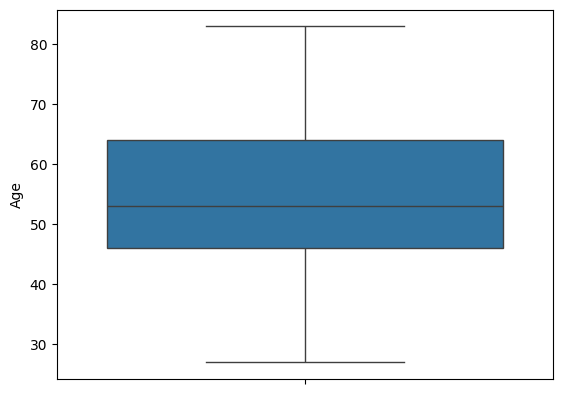

In [32]:
sns.boxplot(copy_df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

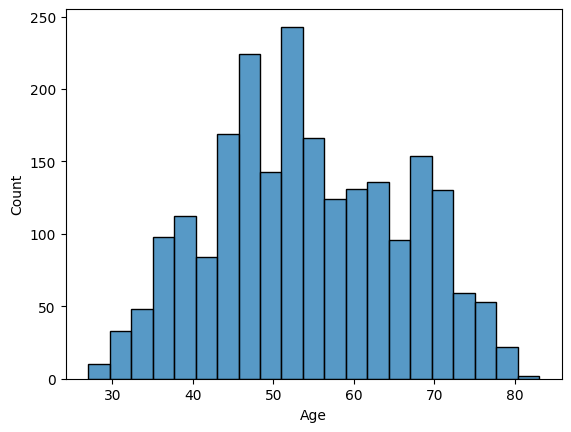

In [88]:
sns.histplot(copy_df['Age'])

# income column filling missing value and outlier removing

In [35]:
missing = copy_df['Income'].isnull().sum()
total_count = len(copy_df['Income'])
missing_percent = missing / total_count * 100
print(f"Missing values in Income column: {missing_percent:.2f}%")


Missing values in Income column: 1.07%


In [36]:
copy_df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [37]:
# filling null value with median

copy_df['Income']=copy_df['Income'].fillna(copy_df['Income'].median())

In [38]:
copy_df['Income'].isnull().sum()

0

In [39]:
copy_df['Income'].skew()
# data is highly skew

6.806244447442672

<Axes: xlabel='Income'>

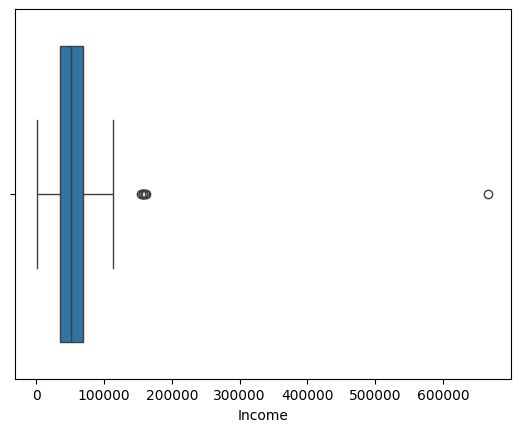

In [40]:
# the outlier in Income column

sns.boxplot(x=copy_df['Income'])

# the data is left side skew so the outlier are in right side

<ipython-input-41-e9bad4af17a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy_df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

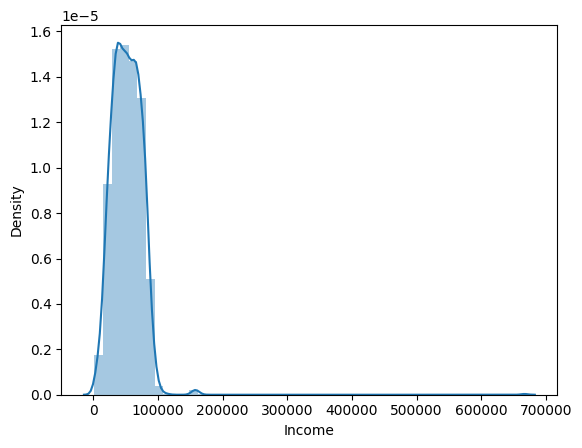

In [41]:
sns.distplot(copy_df['Income'])

<Axes: xlabel='Income', ylabel='Density'>

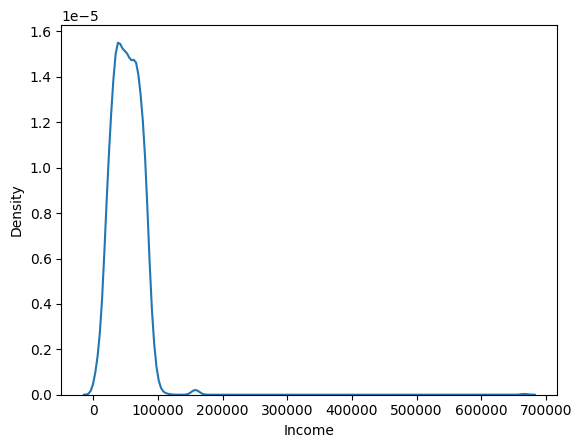

In [42]:
sns.kdeplot(copy_df['Income'])


<Axes: ylabel='Income'>

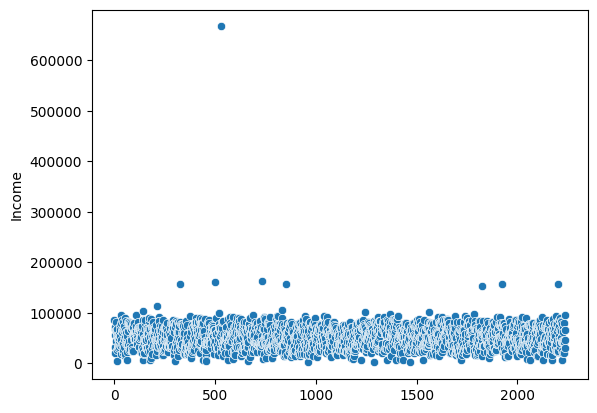

In [43]:
sns.scatterplot(copy_df['Income'])


In [44]:

# calculating the 1st and the 3rd quantile
percentile25 = copy_df['Income'].quantile(0.25)
percentile75 = copy_df['Income'].quantile(0.75)

# calculating the IQR
IQR = percentile75 - percentile25


print(IQR)

32758.0


In [45]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print(f'upper_limit is {upper_limit}')
print(f'lower_limit is {lower_limit}')

upper_limit is 117418.0
lower_limit is -13614.0


In [46]:
outlier  = data[data['Income']> upper_limit]
outlier

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
325,4931,1977,Graduation,Together,157146.0,0,0,4/29/2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0
497,1501,1982,PhD,Married,160803.0,0,0,4/8/2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,2/6/2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0
731,1503,1976,PhD,Together,162397.0,1,1,3/6/2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0
853,5336,1971,Master,Together,157733.0,1,0,4/6/2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,7/2/2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,8/29/2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,1/3/2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0


## caping outlier in Income column

In [47]:
# caping the outlier from the Income column

copy_df['Income'] = np.where(
    copy_df['Income']> upper_limit,upper_limit,
    np.where(
        copy_df['Income']< lower_limit,lower_limit,
        copy_df['Income']
    )
     )

<Axes: ylabel='Income'>

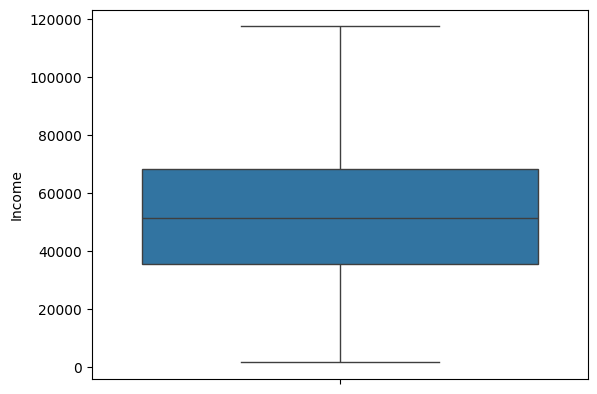

In [48]:
sns.boxplot(copy_df['Income'])

<ipython-input-49-e9bad4af17a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy_df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

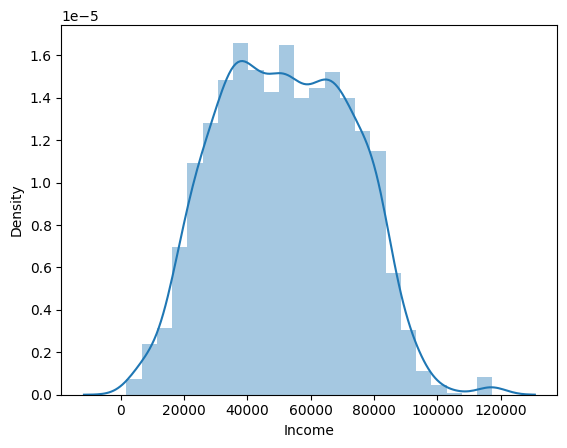

In [49]:
sns.distplot(copy_df['Income'])

# distribution of Age education, marital status

In [50]:
copy_df

,Id,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,Graduation,Divorced,84835.0,0,0,2014-06,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53
1,1,Graduation,Single,57091.0,0,0,2014-06,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62
2,10476,Graduation,Married,67267.0,0,1,2014-05,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65
3,1386,Graduation,Together,32474.0,1,1,2014-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56
4,5371,Graduation,Single,21474.0,1,0,2014-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,2013-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,47
2236,5263,2n Cycle,Married,31056.0,1,0,2013-01,99,5,10,13,3,8,16,1,1,0,3,8,0,0,46
2237,22,Graduation,Divorced,46310.0,1,0,2012-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,47
2238,528,Graduation,Married,65819.0,0,0,2012-11,99,267,38,701,149,165,63,1,5,4,10,3,0,0,45


In [51]:

# Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics.

# Calculating descriptive statistics for age, education, and marital status.
age_stats = copy_df['Age'].describe()
education_stats = copy_df['Education'].describe()
marital_status_stats = copy_df['Marital_Status'].describe()

# Print the descriptive statistics.
print("Age statistics:")
print(age_stats)
print("\nEducation statistics:")
print(education_stats)
print("\nMarital status statistics:")
print(marital_status_stats)




Age statistics:
count    2237.000000
mean       54.098346
std        11.701917
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

Education statistics:
count           2237
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

Marital status statistics:
count        2237
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object


<ipython-input-64-cd93b3d8077f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy_df['Age'])


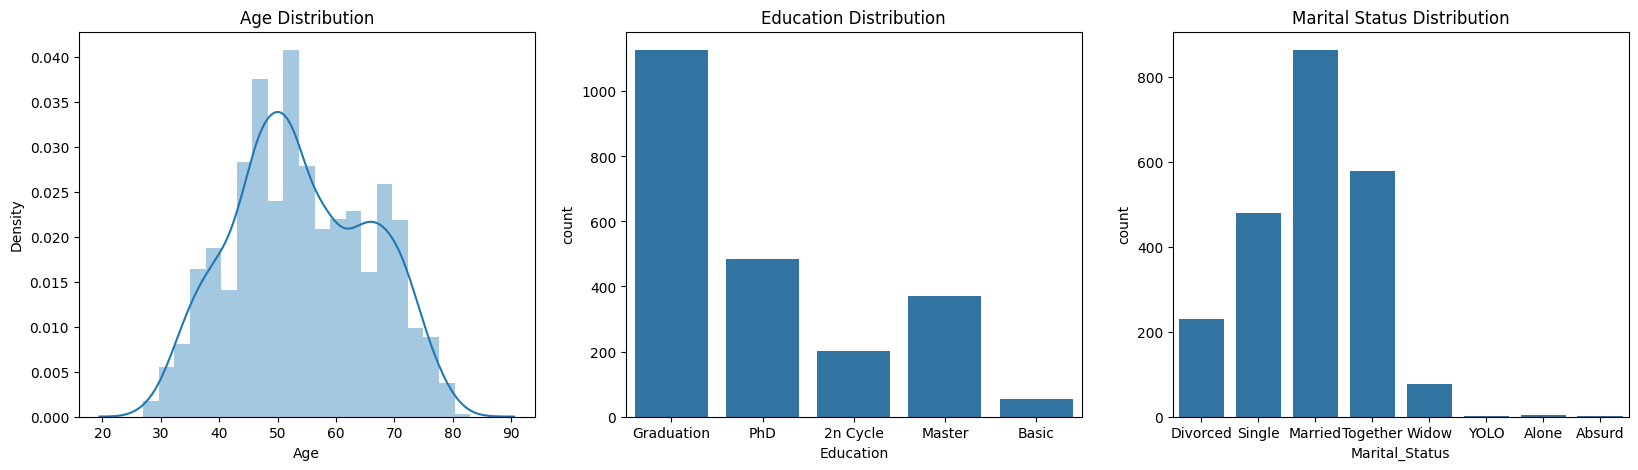

In [64]:
# Create a figure with three subplots.
plt.figure(figsize=(20, 5))

# First subplot: Age distribution.
plt.subplot(1, 3, 1)
sns.distplot(copy_df['Age'])
plt.title('Age Distribution')

# Second subplot: Education distribution.
plt.subplot(1, 3, 2)
sns.countplot(x='Education', data=copy_df)
plt.title('Education Distribution')

# Third subplot: Marital status distribution.
plt.subplot(1, 3, 3)
sns.countplot(x='Marital_Status', data=copy_df)
plt.title('Marital Status Distribution')

# Show the plot.
plt.show()

<ipython-input-53-2435822155ee>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy_df['Age'], ax=ax1)


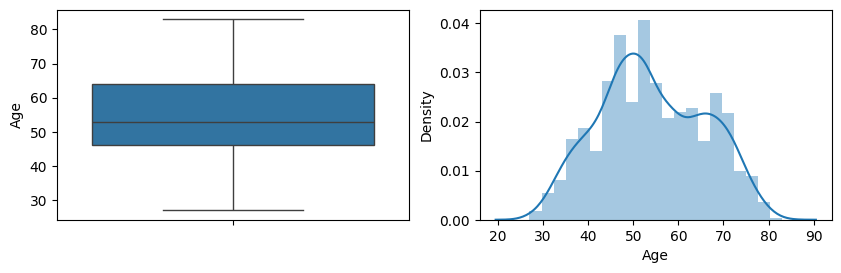

In [53]:

# Create a figure and set its size
fig = plt.figure(figsize=(10, 6))

# Create a grid of subplots
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.2)

# Add the boxplot of age to the first subplot
ax0 = fig.add_subplot(grid[0, 0])
sns.boxplot(copy_df['Age'], ax=ax0)

# Add the distplot of age to the second subplot
ax1 = fig.add_subplot(grid[0, 1])
sns.distplot(copy_df['Age'], ax=ax1)

# Show the figure
plt.show()



#Discriptive statistic task 2

In [57]:
# extract all numerical columns and convert it into dataframe

numerical_cols = copy_df.select_dtypes(include=['int64', 'float64']).columns
numerical_df = copy_df[numerical_cols]

In [58]:
# the mean median and mode for all columns and make a data frame

import pandas as pd

def find_mean_median_mode(df):
  """
  This function calculates the mean, median, and mode for each column in a dataframe.

  Args:
      df: A pandas dataframe.

  Returns:
      A pandas dataframe containing the mean, median, and mode for each column.
  """

  # Initialize an empty dictionary to store the results.
  results = {}

  # Loop through each column in the dataframe.
  for column in df.columns:
    # Calculate the mean, median, and mode for the current column.
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0]

    # Store the results in the dictionary.
    results[column] = {"mean": mean, "median": median, "mode": mode}

  # Create a new dataframe from the dictionary.
  results_df = pd.DataFrame(results).transpose()

  # Return the dataframe.
  return results_df

# Use the function to find the mean, median, and mode for each column in the dataframe.
results_df = find_mean_median_mode(numerical_df)

# Print the results.
print(results_df)


                             mean   median     mode
Id                    5590.726419   5455.0      0.0
Income               51854.722843  51373.0  51373.0
Kidhome                  0.444345      0.0      0.0
Teenhome                 0.506482      0.0      0.0
Recency                 49.104604     49.0     56.0
MntWines               303.995530    174.0      2.0
MntFruits               26.270451      8.0      0.0
MntMeatProducts        166.916853     67.0      7.0
MntFishProducts         37.523022     12.0      0.0
MntSweetProducts        27.068842      8.0      0.0
MntGoldProds            43.968708     24.0      1.0
NumDealsPurchases        2.326777      2.0      1.0
NumWebPurchases          4.087170      4.0      2.0
NumCatalogPurchases      2.662494      2.0      0.0
NumStorePurchases        5.794367      5.0      3.0
NumWebVisitsMonth        5.319177      6.0      7.0
Response                 0.149307      0.0      0.0
Complain                 0.008941      0.0      0.0
Age         

In [59]:
# calculate variance and std for all numerical columns and make a dataframe


def find_variance_std(df):
  """
  This function calculates the variance and standard deviation for each column in a dataframe.

  Args:
      df: A pandas dataframe.

  Returns:
      A pandas dataframe containing the variance and standard deviation for each column.
  """

  # Initialize an empty dictionary to store the results.
  results = {}

  # Loop through each column in the dataframe.
  for column in df.columns:
    # Calculate the variance and standard deviation for the current column.
    variance = df[column].var()
    std = df[column].std()

    # Store the results in the dictionary.
    results[column] = {"variance": variance, "std": std}

  # Create a new dataframe from the dictionary.
  results_df = pd.DataFrame(results).transpose()

  # Return the dataframe.
  return results_df

# Use the function to find the variance and standard deviation for each column in the dataframe.
results_df = find_variance_std(numerical_df)

# Print the results.
print(results_df)


                         variance           std
Id                   1.053079e+07   3245.118591
Income               4.383263e+08  20936.243557
Kidhome              2.899468e-01      0.538467
Teenhome             2.965814e-01      0.544593
Recency              8.384542e+02     28.956073
MntWines             1.132823e+05    336.574382
MntFruits            1.577358e+03     39.715972
MntMeatProducts      5.092296e+04    225.661158
MntFishProducts      2.985520e+03     54.639909
MntSweetProducts     1.705190e+03     41.293949
MntGoldProds         2.709652e+03     52.054318
NumDealsPurchases    3.736192e+00      1.932923
NumWebPurchases      7.725403e+00      2.779461
NumCatalogPurchases  8.546594e+00      2.923456
NumStorePurchases    1.056861e+01      3.250940
NumWebVisitsMonth    5.887347e+00      2.426386
Response             1.270713e-01      0.356471
Complain             8.864575e-03      0.094152
Age                  1.369349e+02     11.701917


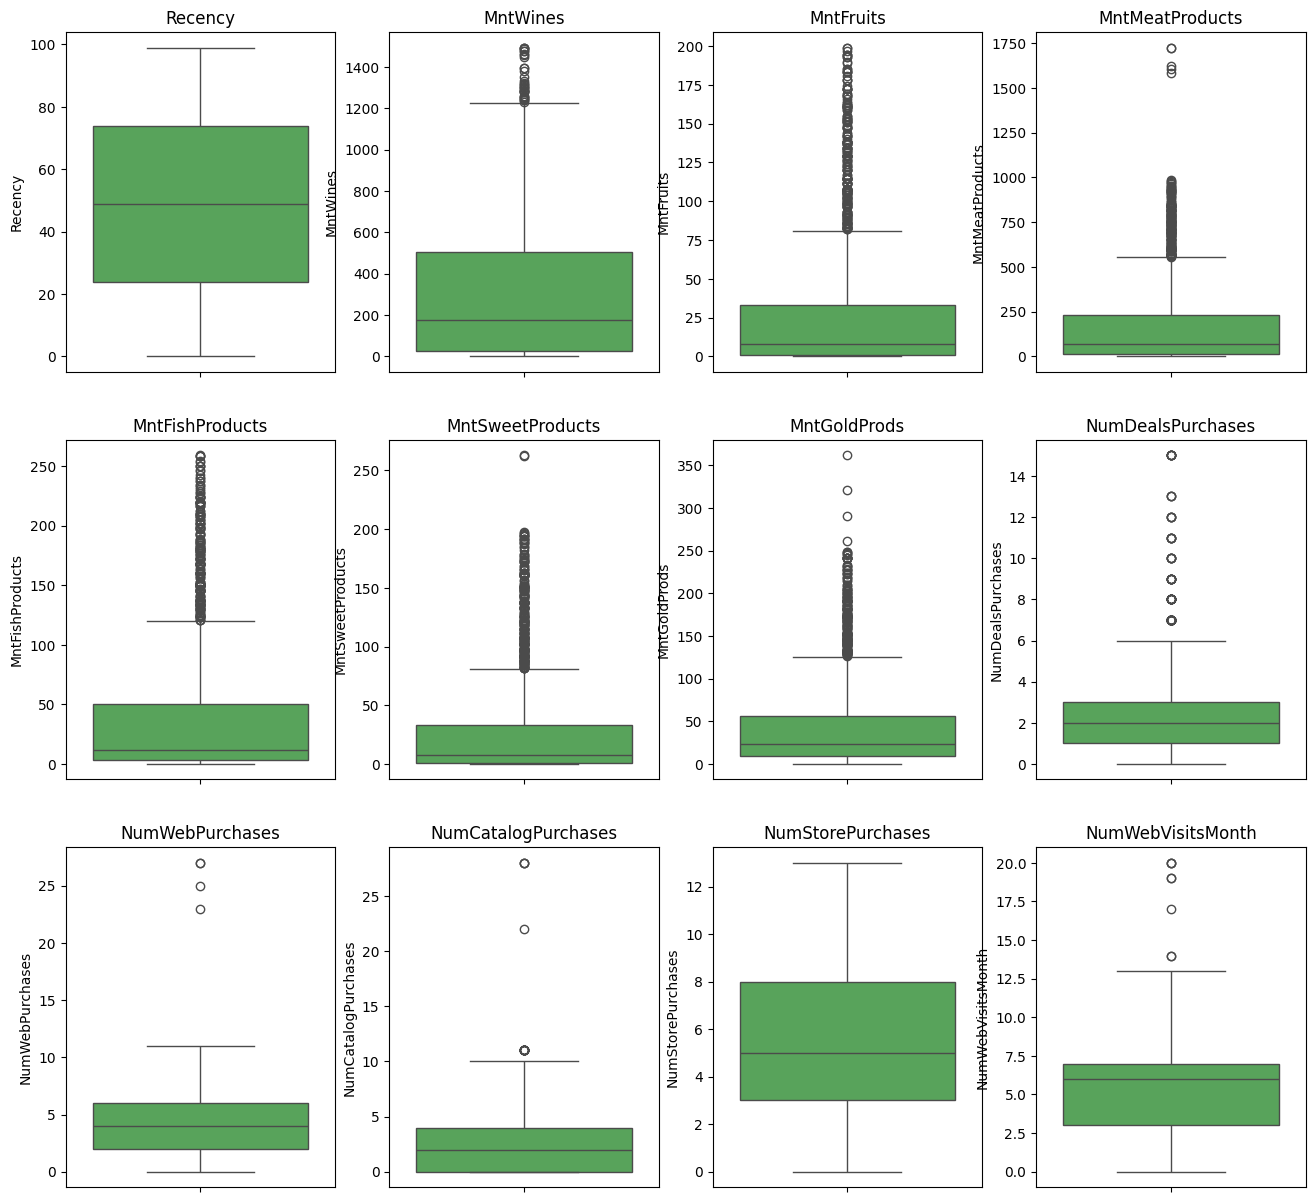

In [65]:
# creating a box plot for detecting outlier

list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(copy_df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1
plt.show()


In [ ]:
# conclusion: in some column there are many outlier

#Probability distribution

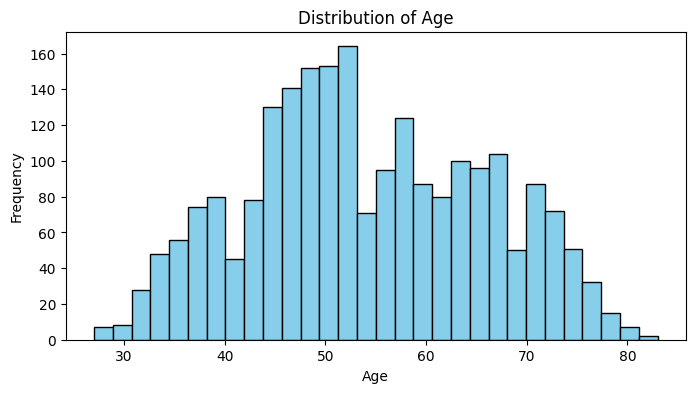

Age does not follow a Normal distribution (p-value = 0.0000)


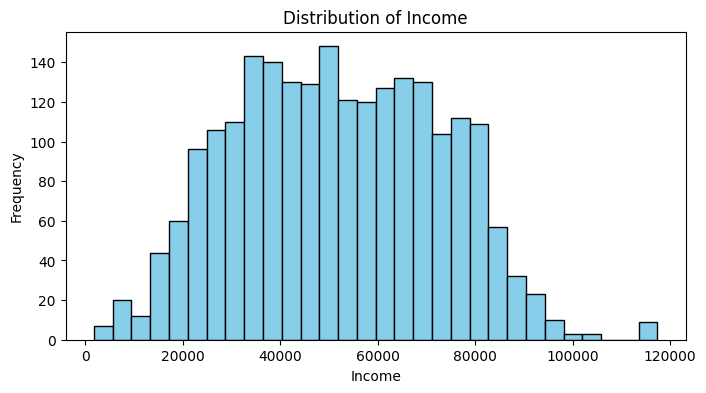

Income does not follow a Normal distribution (p-value = 0.0000)


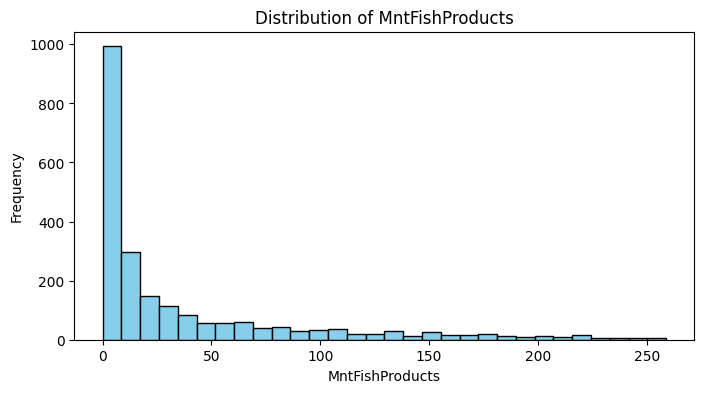

MntFishProducts does not follow a Normal distribution (p-value = 0.0000)


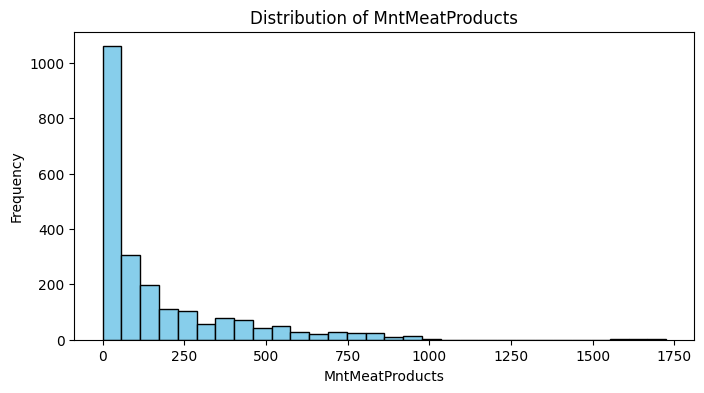

MntMeatProducts does not follow a Normal distribution (p-value = 0.0000)


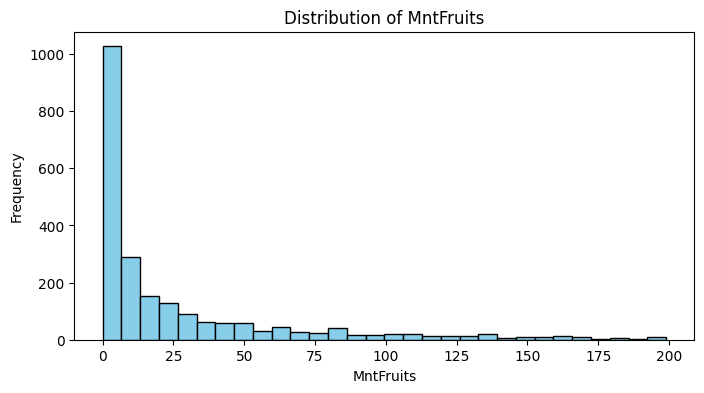

MntFruits does not follow a Normal distribution (p-value = 0.0000)


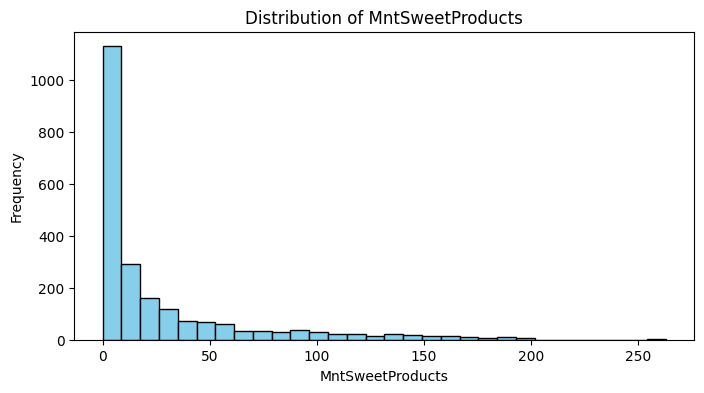

MntSweetProducts does not follow a Normal distribution (p-value = 0.0000)


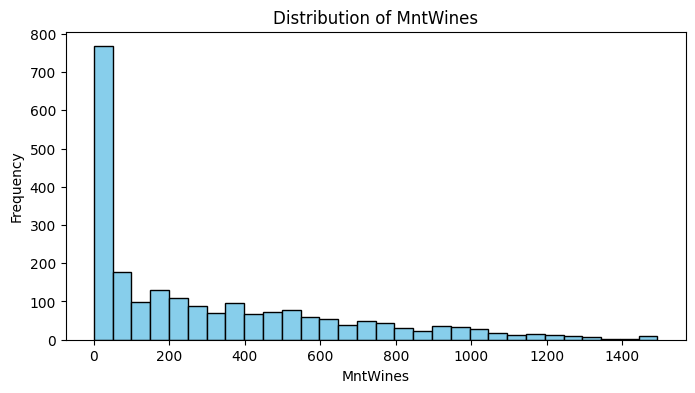

MntWines does not follow a Normal distribution (p-value = 0.0000)


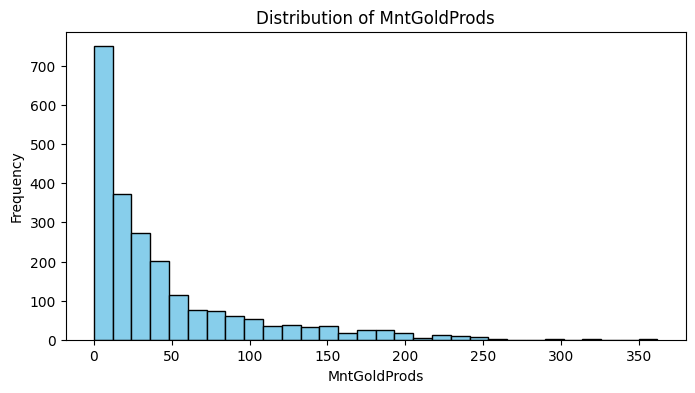

MntGoldProds does not follow a Normal distribution (p-value = 0.0000)


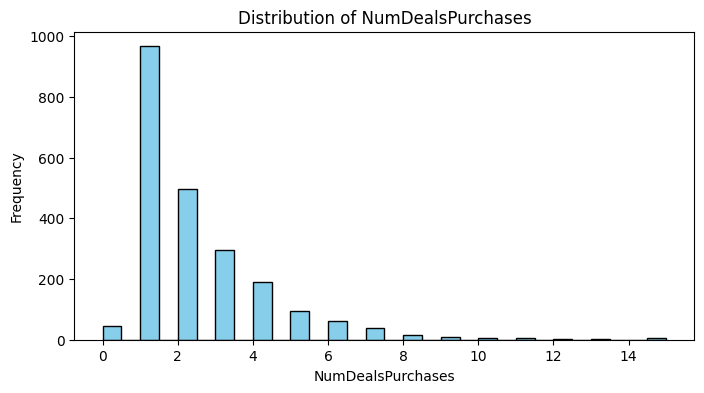

NumDealsPurchases does not follow a Normal distribution (p-value = 0.0000)


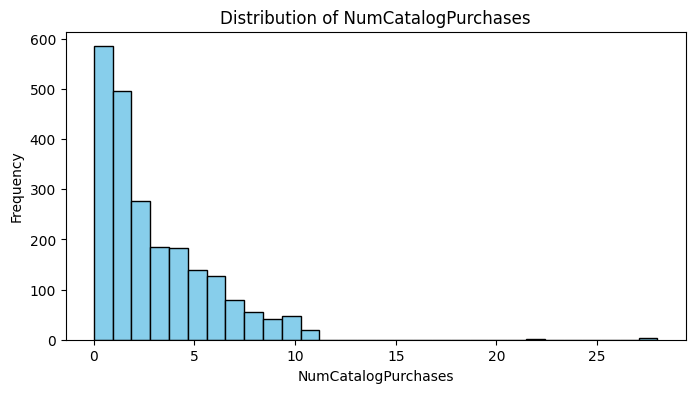

NumCatalogPurchases does not follow a Normal distribution (p-value = 0.0000)


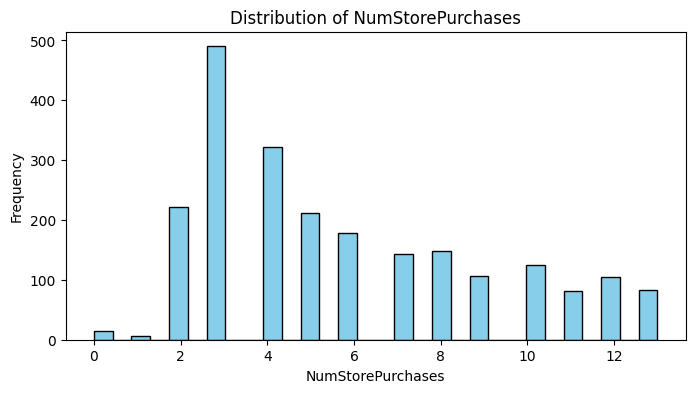

NumStorePurchases does not follow a Normal distribution (p-value = 0.0000)


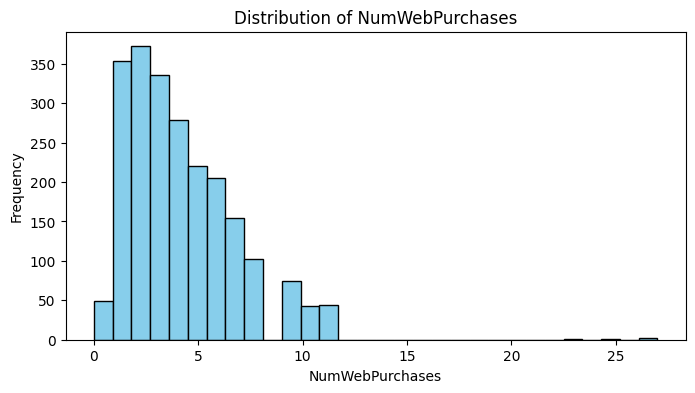

NumWebPurchases does not follow a Normal distribution (p-value = 0.0000)


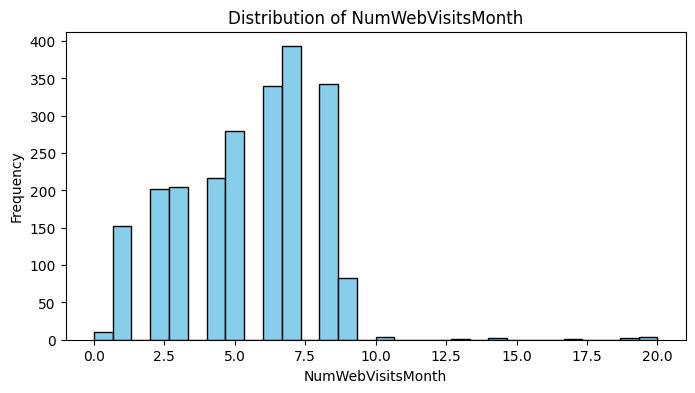

NumWebVisitsMonth does not follow a Normal distribution (p-value = 0.0000)


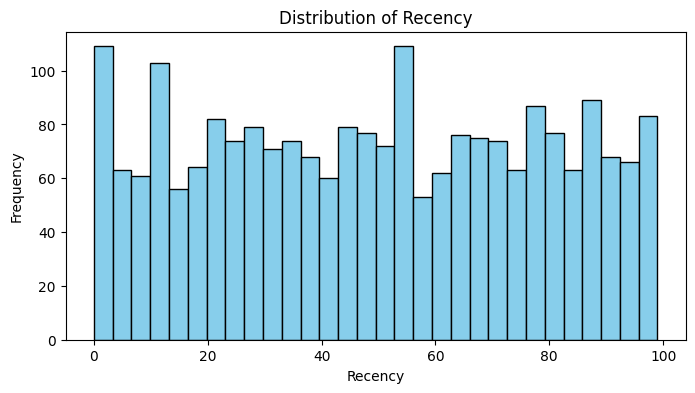

Recency does not follow a Normal distribution (p-value = 0.0000)


In [63]:
# Define numerical variables for analysis
numerical_vars = copy_df[['Age', 'Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits',
                  'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']]

# Iterate over numerical variables
for var in numerical_vars:
    # Explore the distribution
    plt.figure(figsize=(8, 4))
    plt.hist(copy_df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Perform Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = shapiro(copy_df[var])
    if shapiro_p > 0.05:
        print(f"{var} follows a Normal distribution (p-value = {shapiro_p:.4f})")
        # Calculate probabilities and expected values based on Normal distribution if needed
    else:
        print(f"{var} does not follow a Normal distribution (p-value = {shapiro_p:.4f})")
        # Check if it follows other distributions or use non-parametric methods



In [68]:
import pandas as pd
from scipy.stats import binom



# Select the 'Response' variable
response_data = copy_df['Age']

# Calculate the mean and variance of the 'Response' variable
mean_response = response_data.mean()
var_response = response_data.var()

# Check if the 'Response' variable follows a Binomial distribution
if mean_response * (1 - mean_response) == var_response:
    print("The 'Response' variable follows a Binomial distribution.")
    # Calculate probabilities and expected values based on the Binomial distribution
    # For example, let's calculate the probability of a customer accepting the offer
    n_trials = len(response_data)
    p_success = mean_response
    probability_accept_offer = binom.pmf(1, n_trials, p_success)
    print("Probability of a customer accepting the offer:", probability_accept_offer)
    # Calculate the expected number of customers accepting the offer
    expected_accept_offer = n_trials * p_success
    print("Expected number of customers accepting the offer:", expected_accept_offer)
else:
    print("The 'Response' variable does not follow a Binomial distribution.")


The 'Response' variable does not follow a Binomial distribution.


# 4 task


<ipython-input-76-3a7b87693e8e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = copy_df.corr()


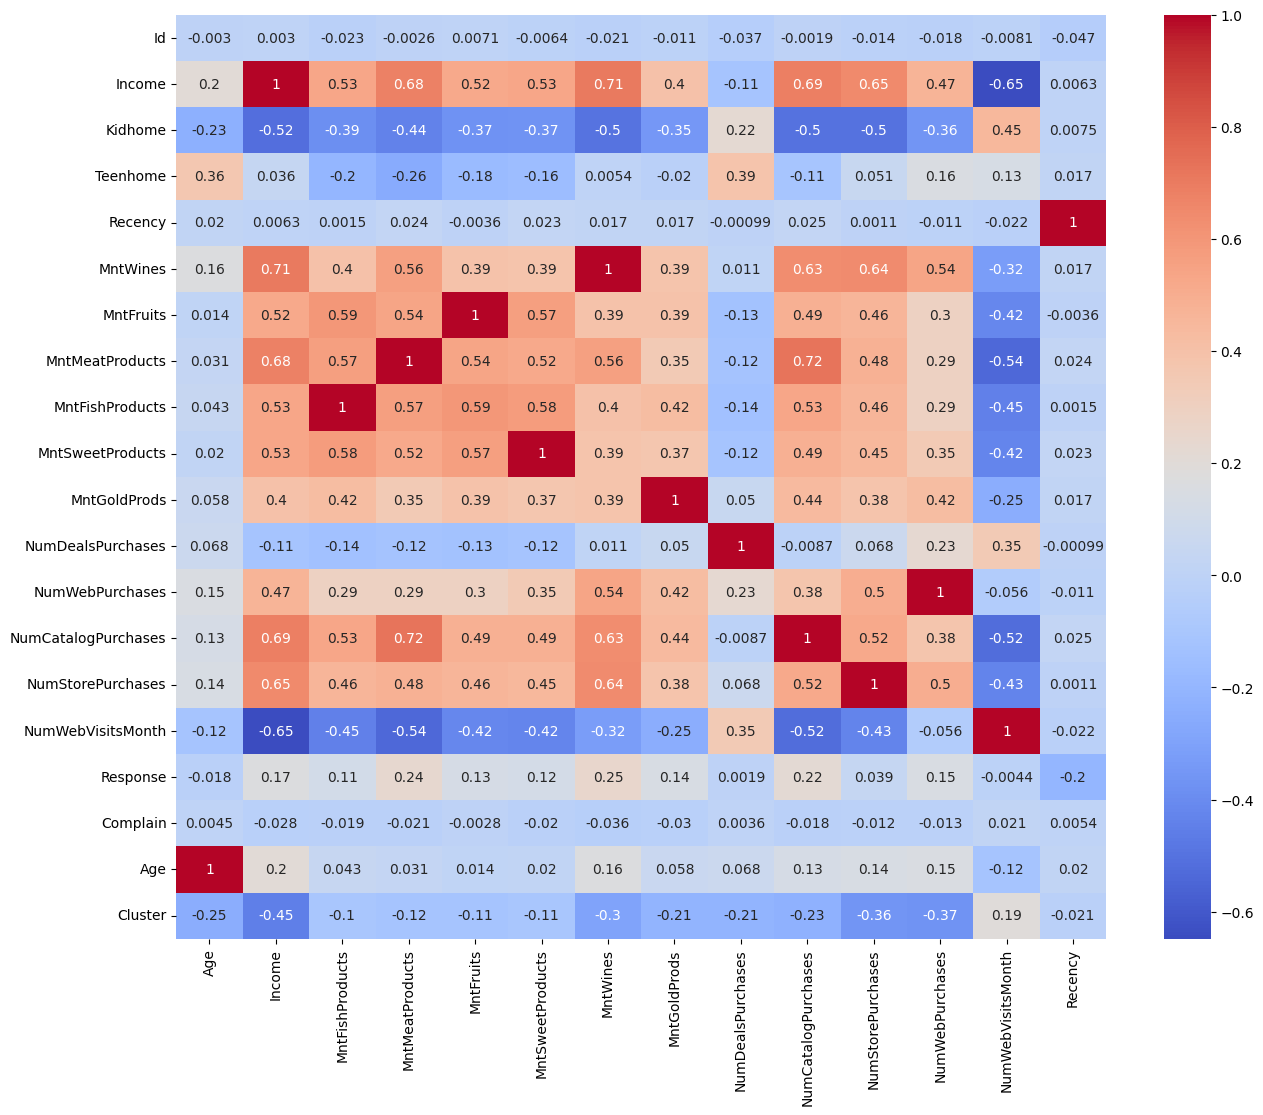

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
Number of customers: 804
Average age: 56.86
Average income: 52108.83
Average spending on fish products: 24.77
Average spending on meat products: 98.05
Average spending on fruits: 18.25
Average spending on sweet products: 18.04
Average spending on wines: 283.91
Average spending on gold products: 45.30
Average number of deals purchases: 3.10
Average number of catalog purchases: 2.23
Average number of store purchases: 6.02
Average number of web purchases: 4.70
Average number of web visits per month: 5.70
Average recency: 49.86

Cluster 2:
Number of customers: 698
Average age: 55.43
Average income: 76411.91
Average spending on fish products: 82.11
Average spending on meat products: 394.99
Average spending on fruits: 56.83
Average spending on sweet products: 59.58
Average spending on wines: 615.35
Average spending on gold products: 70.01
Average number of deals purchases: 1.63
Average number of catalog purchases: 5.41
Average number of store purchases: 8.39
Average number of web 

In [76]:
plt.figure(figsize=(15, 12))

# Explore relationships between customer characteristics and spending habits
# Calculate correlation coefficients between numerical variables
corr_matrix = copy_df.corr()

# Select relevant columns for analysis
relevant_cols = ['Age', 'Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits',
                  'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix[relevant_cols], annot=True, cmap='coolwarm')
plt.show()

# Segment customers based on their behaviors and characteristics
# Perform clustering analysis using K-means clustering
from sklearn.cluster import KMeans

# Choose the number of clusters
num_clusters = 3

# Create a KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the data
kmeans.fit(copy_df[relevant_cols])

# Get cluster labels for each customer
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
copy_df['Cluster'] = cluster_labels

# Analyze the characteristics of each cluster
for i in range(num_clusters):
    cluster_df = copy_df[copy_df['Cluster'] == i]
    print(f"Cluster {i + 1}:")
    print(f"Number of customers: {len(cluster_df)}")
    print(f"Average age: {cluster_df['Age'].mean():.2f}")
    print(f"Average income: {cluster_df['Income'].mean():.2f}")
    print(f"Average spending on fish products: {cluster_df['MntFishProducts'].mean():.2f}")
    print(f"Average spending on meat products: {cluster_df['MntMeatProducts'].mean():.2f}")
    print(f"Average spending on fruits: {cluster_df['MntFruits'].mean():.2f}")
    print(f"Average spending on sweet products: {cluster_df['MntSweetProducts'].mean():.2f}")
    print(f"Average spending on wines: {cluster_df['MntWines'].mean():.2f}")
    print(f"Average spending on gold products: {cluster_df['MntGoldProds'].mean():.2f}")
    print(f"Average number of deals purchases: {cluster_df['NumDealsPurchases'].mean():.2f}")
    print(f"Average number of catalog purchases: {cluster_df['NumCatalogPurchases'].mean():.2f}")
    print(f"Average number of store purchases: {cluster_df['NumStorePurchases'].mean():.2f}")
    print(f"Average number of web purchases: {cluster_df['NumWebPurchases'].mean():.2f}")
    print(f"Average number of web visits per month: {cluster_df['NumWebVisitsMonth'].mean():.2f}")
    print(f"Average recency: {cluster_df['Recency'].mean():.2f}")
    print()


# task 5

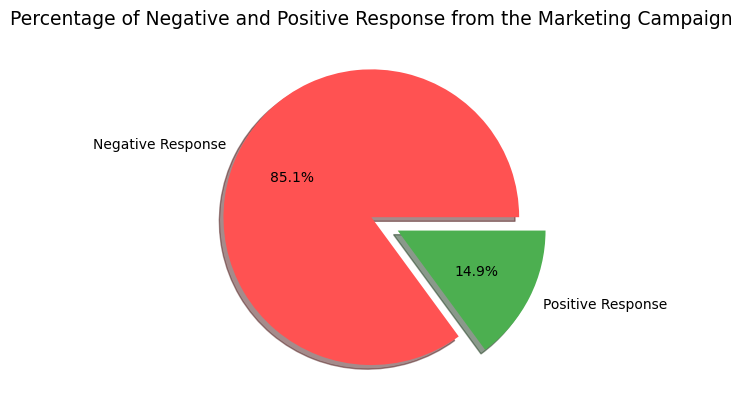

In [77]:
fig, ax = plt.subplots()

ax.pie(
    copy_df['Response'].value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=13.5)

plt.show()


In [ ]:
#  conclusion :  only 15% of customers providing a positive response

<ipython-input-79-a263483ba7c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(copy_df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])
<ipython-input-79-a263483ba7c4>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative Response', 'Positive Response'])


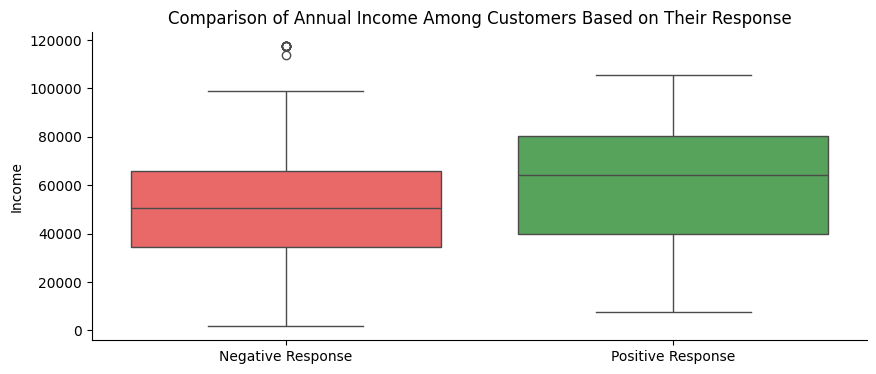

In [79]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(copy_df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])

ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparison of Annual Income Among Customers Based on Their Response', fontsize=12)

ax.set_xticklabels(['Negative Response', 'Positive Response'])
ax.set_xlabel('')

plt.show()

In [ ]:
# conclusion : We can see that customers who provide a positive response, have a higher annual income

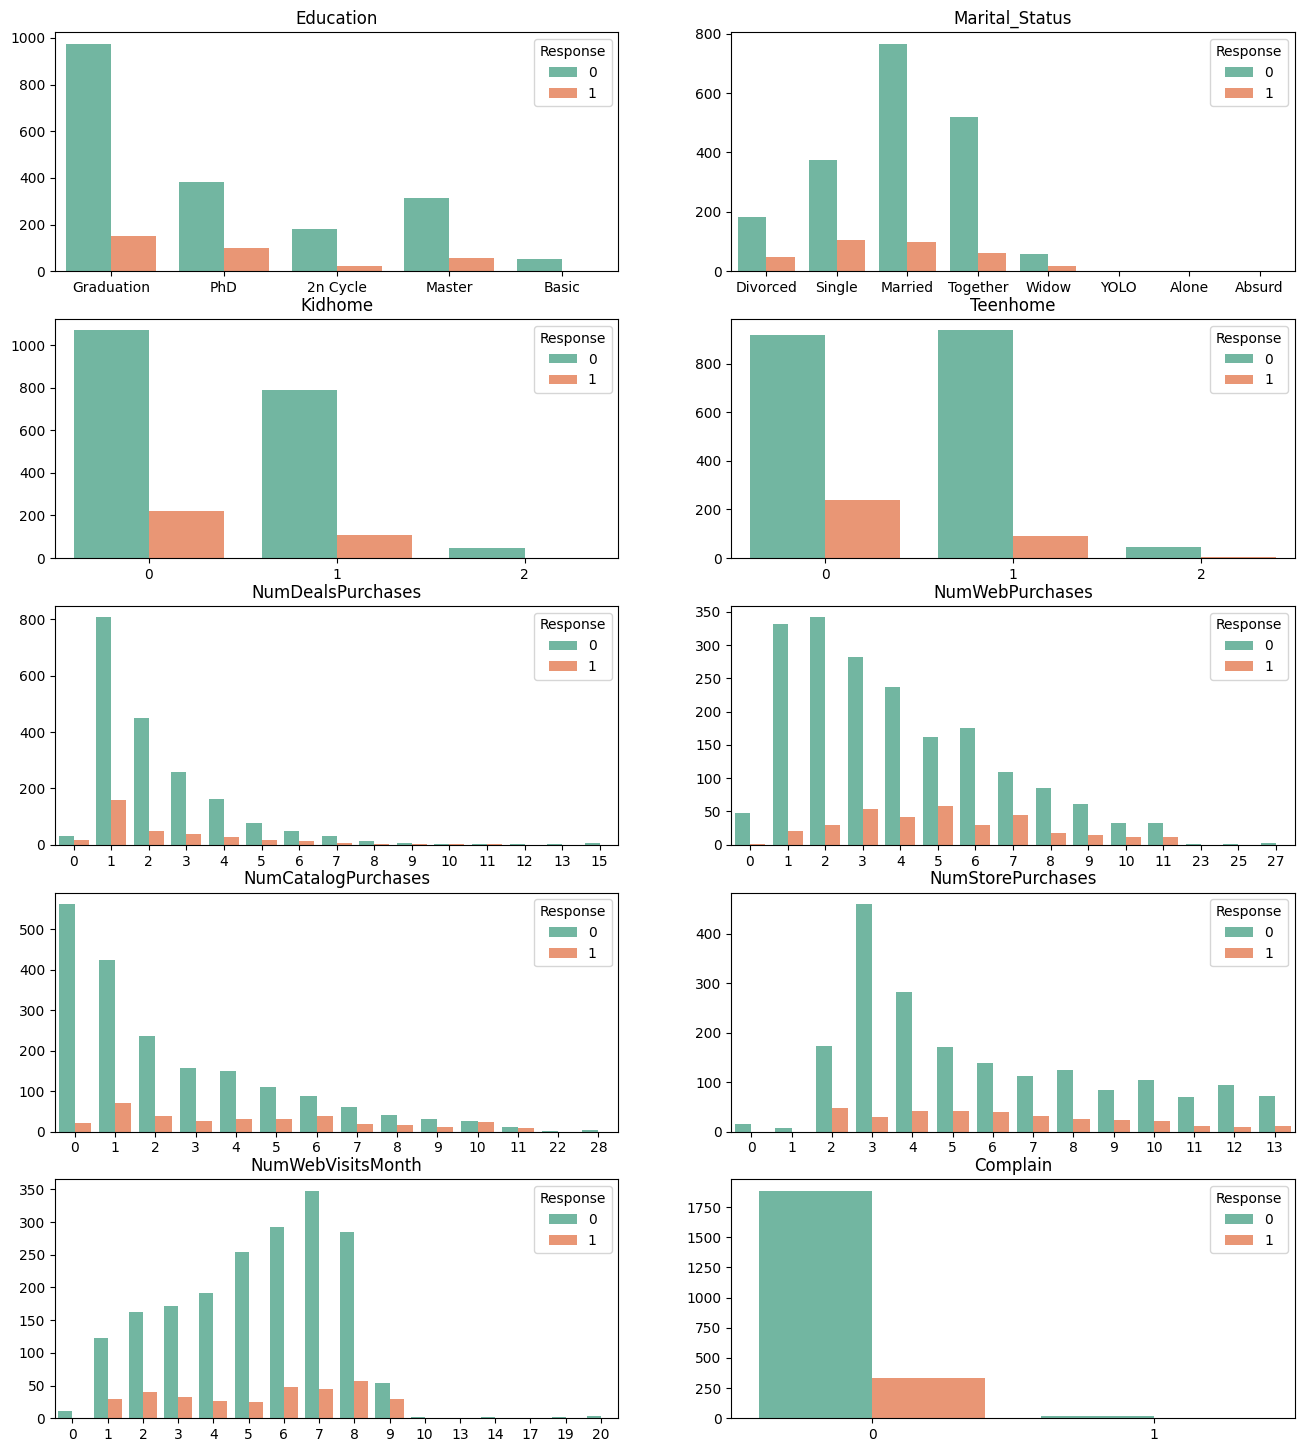

In [80]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']


fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(copy_df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')

        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')

        cont = cont + 1

plt.show()

In [ ]:
# conclusion : As number of purchases, both through the catalog and in store and on the web, increases, the percentage of customers responding positively to the campaign will also increase.

<ipython-input-81-ec3d9457c0ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(copy_df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-81-ec3d9457c0ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(copy_df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-81-ec3d9457c0ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(copy_df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
<ipython-input-81-ec3d9457c0ad>:10: FutureWarning: 

Passing `palette`

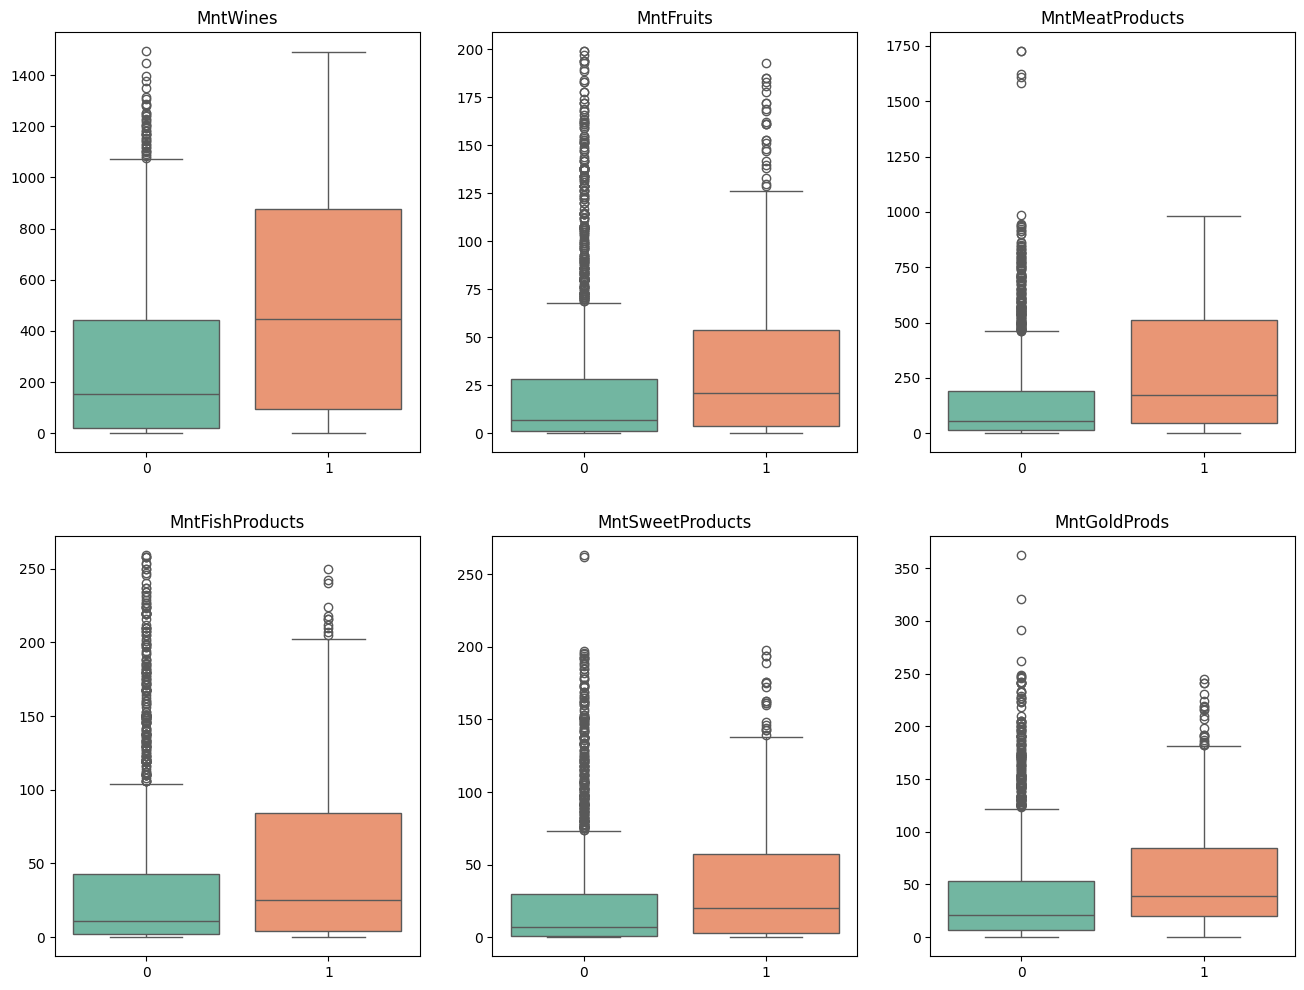

In [81]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(copy_df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')

        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')

        cont = cont + 1

plt.show()

In [ ]:
''' conclusion :
                As customers purchase more of these products,
                the likelihood of their responding positively to the campaign increases.'''